In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prepData import *
from math import sqrt
from sklearn.neural_network import MLPRegressor
from plotterUtils import *

In [3]:
df_perjet = jet_level_data()

factorNames = ['jet_pt_ak7',
               'jet_eta_ak7',
                 'jet_photonFrac_ak7',
                 'jet_electronFrac_ak7',
                 'jet_muonFrac_ak7',
                 'jet_neuHadronFrac_ak7',
                 'jet_charHadronFrac_ak7',
                 'jet_electronMult_ak7',
                 'jet_muonMult_ak7',
                 'jet_photonMult_ak7',
                 'jet_neuHadronMult_ak7',
                 'jet_charHadronMult_ak7'
                ]

allFactors = ['jet_pt_ak7',
              'jet_eta_ak7',
              'jet_photonFrac_ak7',
              'jet_electronFrac_ak7',
              'jet_muonFrac_ak7',
                 'jet_neuHadronFrac_ak7',
                 'jet_charHadronFrac_ak7',
                 'jet_electronMult_ak7',
                 'jet_muonMult_ak7',
                 'jet_photonMult_ak7',
                 'jet_neuHadronMult_ak7',
                 'jet_charHadronMult_ak7'
                ]

In [4]:
df_perjet.shape

(391385, 36)

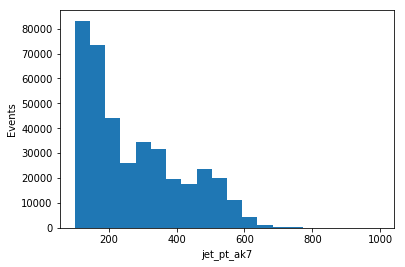

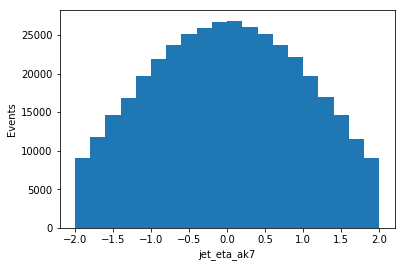

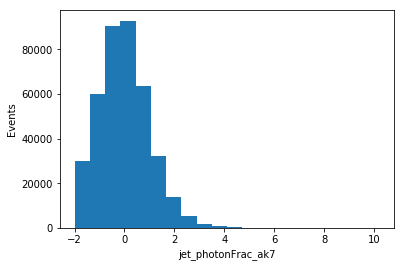

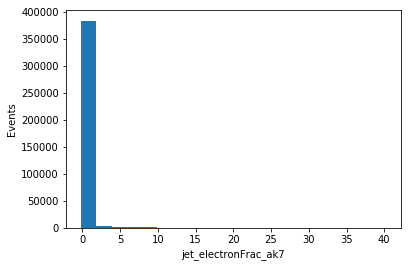

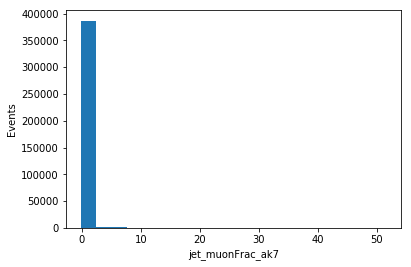

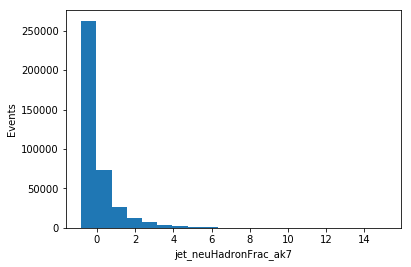

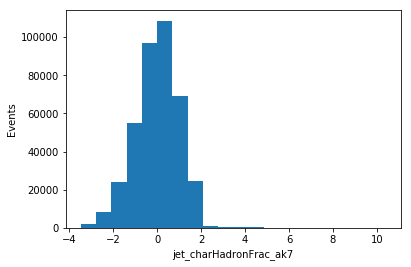

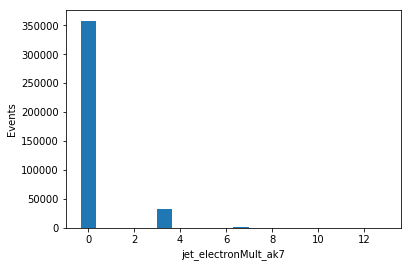

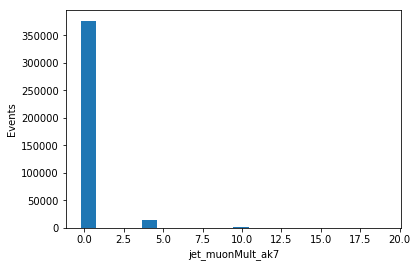

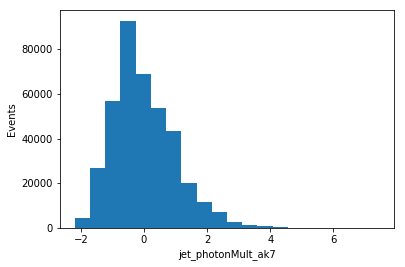

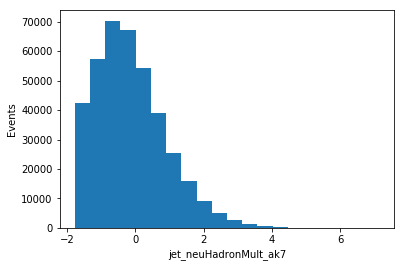

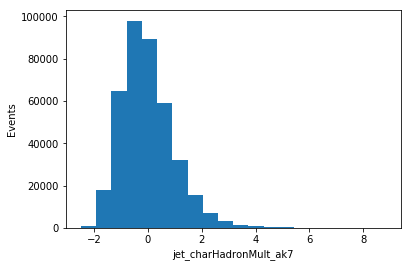

In [5]:
scaleData = True
if( scaleData ):
    means = df_perjet.mean()
    rmss = df_perjet.std()

    normalFactors = [
                  'jet_photonFrac_ak7',
                  'jet_electronFrac_ak7',
                  'jet_muonFrac_ak7',
                  'jet_neuHadronFrac_ak7',
                  'jet_charHadronFrac_ak7',
                  'jet_electronMult_ak7',
                  'jet_muonMult_ak7',
                  'jet_photonMult_ak7',
                  'jet_neuHadronMult_ak7',
                  'jet_charHadronMult_ak7'
                    ]

    for f in normalFactors:
        df_perjet[f] = map(lambda x : (x-means[f])/rmss[f],df_perjet[f])

    for i,f in enumerate(factorNames):
        plt.hist(df_perjet[f],20)
        plt.xlabel(f)
        plt.ylabel("Events")
        plt.show()

In [6]:

df_train,df_test = np.array_split(df_perjet,2)

model = MLPRegressor(hidden_layer_sizes=[200],activation='tanh',random_state=12345)
model.fit(df_train[factorNames],df_train['jet_jes_ak7'])

df_train['prediction'] = model.predict(df_train[factorNames])
df_train['residual'] = df_train['prediction']-df_train['jet_jes_ak7']
df_train['sq_diff'] = map(lambda x : x*x,df_train['residual'])
print "RMSE:",sqrt(df_train.sum()['sq_diff']/len(df_train['sq_diff']))
df_test['prediction'] = model.predict(df_test[factorNames])
df_test['residual'] = df_test['prediction']-df_test['jet_jes_ak7']
df_test['sq_diff'] = map(lambda x : x*x,df_test['residual'])
print "RMSE:",sqrt(df_test.sum()['sq_diff']/len(df_test['sq_diff']))



RMSE: 0.00820664994072
RMSE: 0.0076358102847


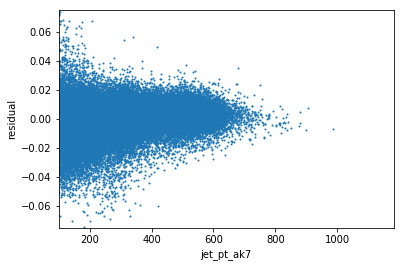

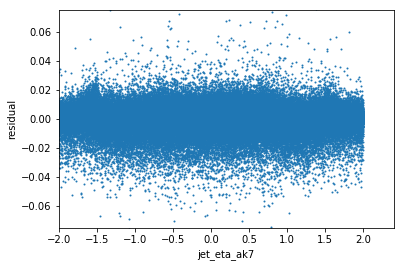

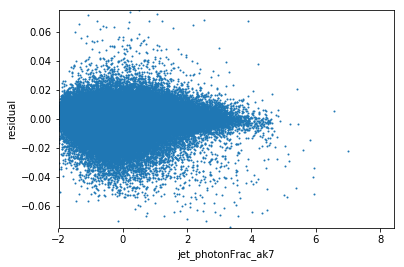

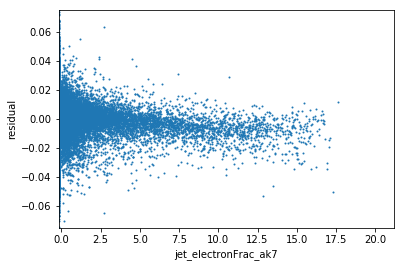

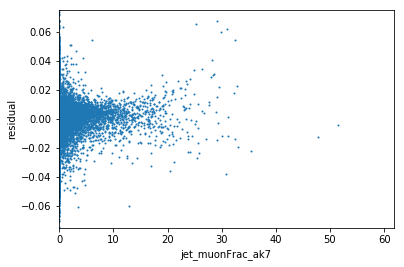

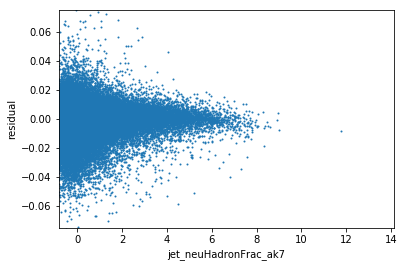

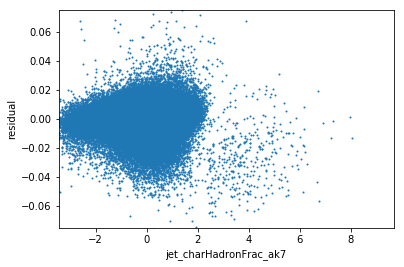

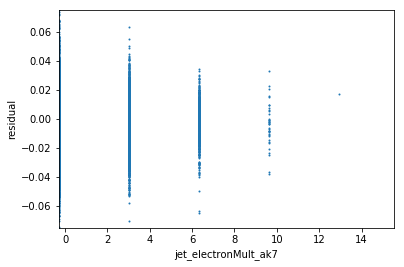

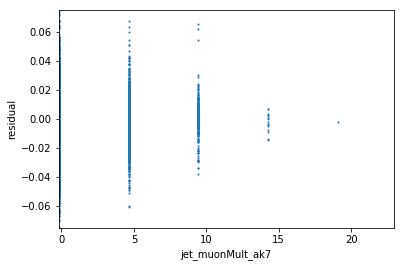

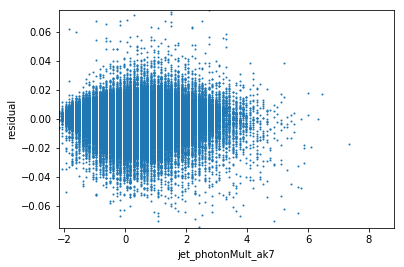

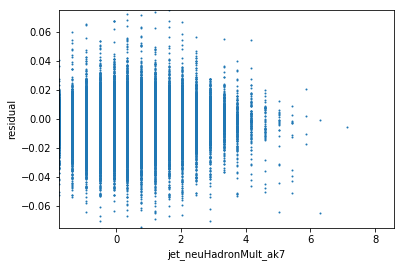

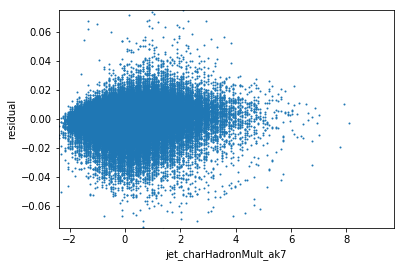

In [7]:
means = df_test.mean()
mins = df_test.min()
maxs = df_test.max()
def generate_scan(xlow,xhigh,n=100,projectionVar='jet_pt_ak7'):
    scanData = []
    for f in factorNames:
        if f == projectionVar : 
            a = range(0,n+1)
            a = map(lambda x : xlow+x*(xhigh-xlow)/float(n+1),a)
            scanData.append(a)
        else :
            scanData.append([means[f]]*(n+1))
    return np.array(scanData).transpose()

for i,f in enumerate(factorNames):
    #plt.subplot(3,4,i+1)
    scanX = generate_scan(min(df_test[f]),max(df_test[f]),100,f)
    #print len(scanX.transpose()[i])
    scanY = model.predict(scanX)
    #print len(scanY)
    plt.scatter(df_test[f],df_test['residual'],s=1)
    #plt.scatter(scanX.transpose()[i],scanY,s=3,color='r')
    plt.xlabel(f)
    plt.ylabel("residual")
    plt.xlim(mins[f],maxs[f]*1.2)
    plt.ylim(-.075,.075)
    plt.show()

0.0076358102847


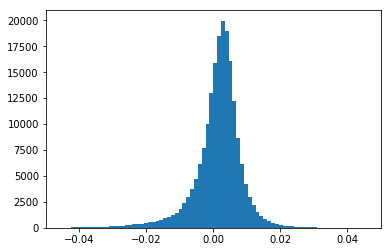

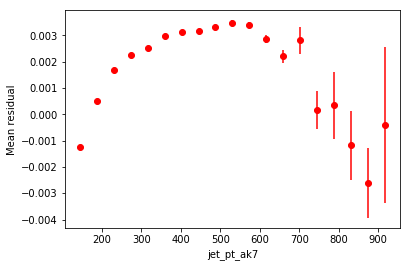

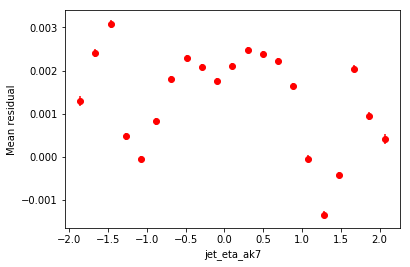

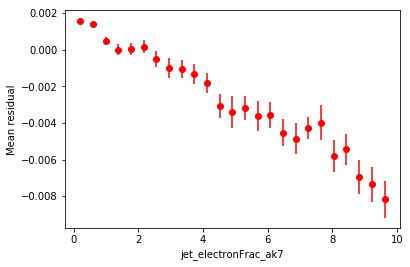

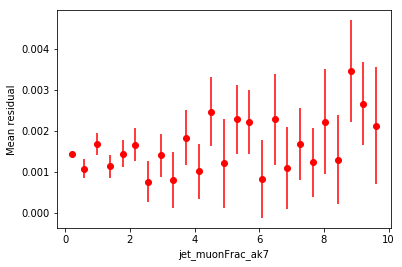

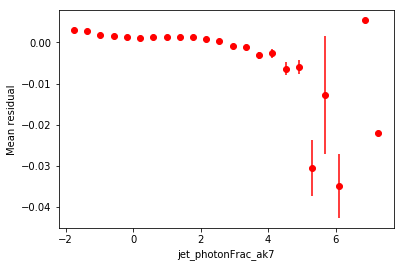

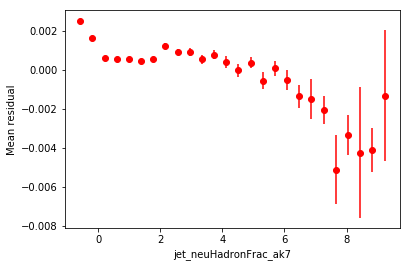

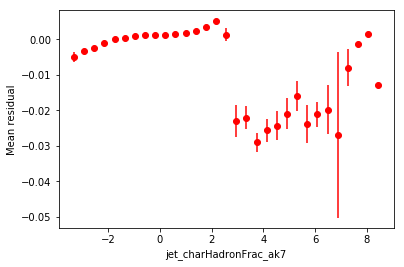

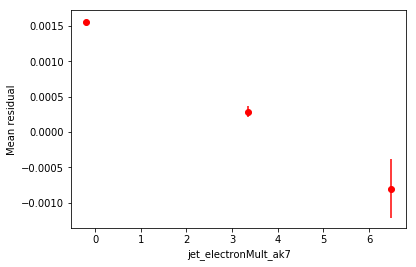

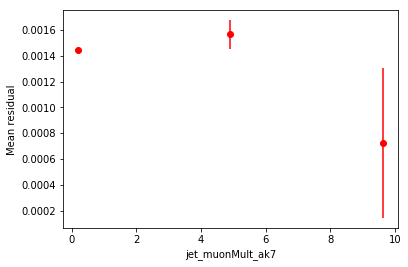

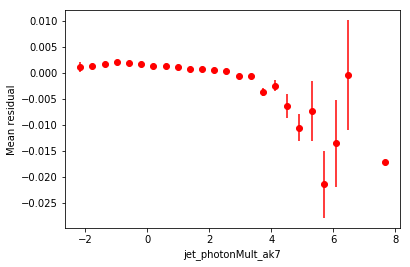

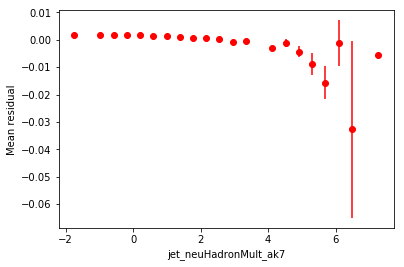

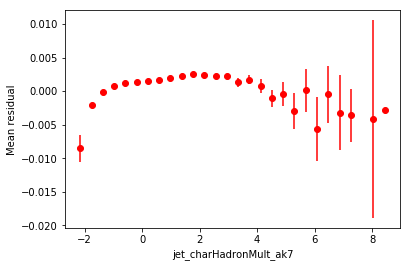

In [8]:
df_test['res_sq'] = map(lambda x : x*x , df_test['residual'])
print sqrt(df_test.sum()['res_sq']/len(df_test['residual']))

plt.hist(df_test['residual'],200)
plt.xlim(-0.05,0.05)
#plt.gca().set_yscale("log")
plt.show()

plotMean(df_test,'residual','jet_pt_ak7',20,100,1000)
plt.show()
plotMean(df_test,'residual','jet_eta_ak7',50,-5.,5.)
plt.show()
plotMean(df_test,'residual','jet_electronFrac_ak7',50,-10.,10.)
plt.show()
plotMean(df_test,'residual','jet_muonFrac_ak7',50,-10.,10.)
plt.show()
plotMean(df_test,'residual','jet_photonFrac_ak7',50,-10.,10.)
plt.show()
plotMean(df_test,'residual','jet_neuHadronFrac_ak7',50,-10.,10.)
plt.show()
plotMean(df_test,'residual','jet_charHadronFrac_ak7',50,-10.,10.)
plt.show()
plotMean(df_test,'residual','jet_electronMult_ak7',50,-10.,10.)
plt.show()
plotMean(df_test,'residual','jet_muonMult_ak7',50,-10.,10.)
plt.show()
plotMean(df_test,'residual','jet_photonMult_ak7',50,-10.,10.)
plt.show()
plotMean(df_test,'residual','jet_neuHadronMult_ak7',50,-10.,10.)
plt.show()
plotMean(df_test,'residual','jet_charHadronMult_ak7',50,-10.,10.)
plt.show()

0.00727646563004


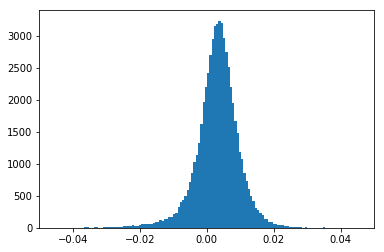

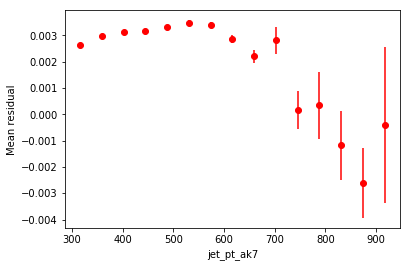

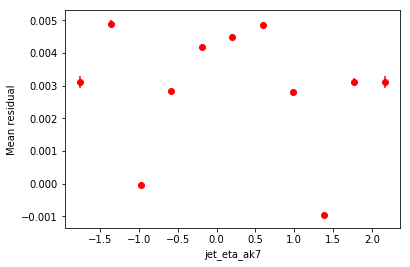

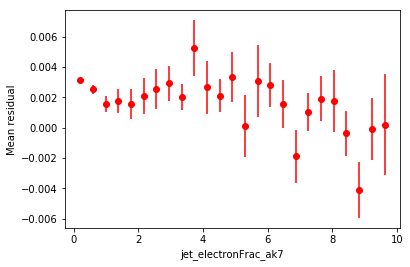

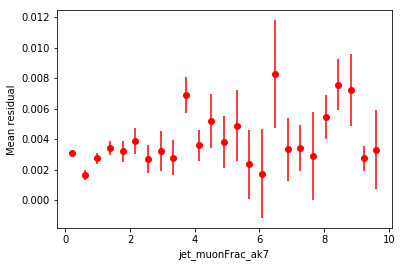

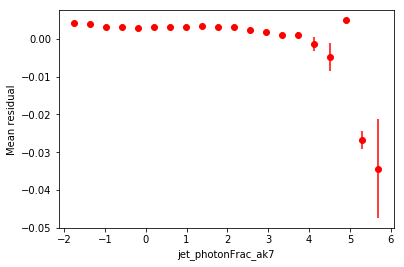

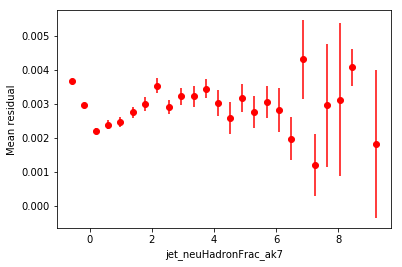

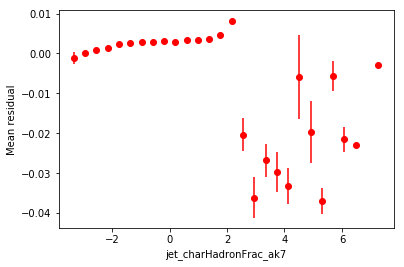

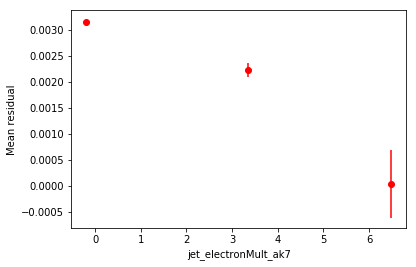

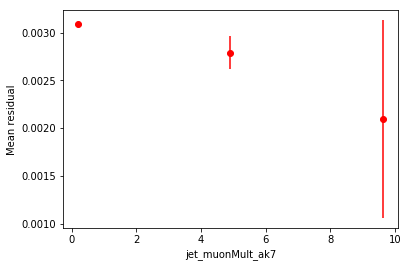

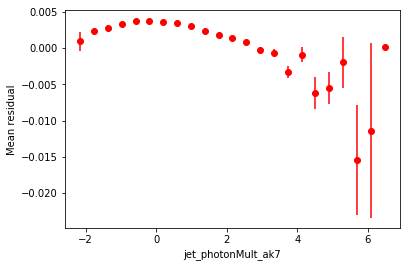

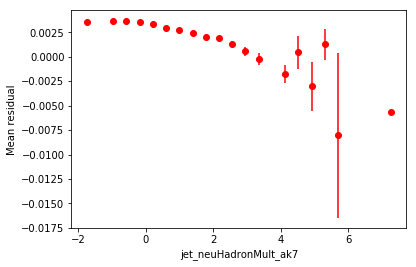

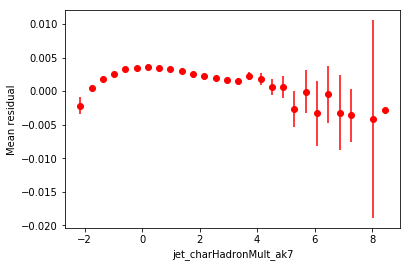

In [9]:
cut=(df_test['jet_pt_ak7']>300.)

df_test['res_sq'] = map(lambda x : x*x , df_test['residual'])
print sqrt(df_test.loc[cut,:].sum()['res_sq']/len(df_test.loc[cut,'residual']))

plt.hist(df_test.loc[cut,'residual'],200)
plt.xlim(-0.05,0.05)
plt.show()
 
selectedData = df_test.loc[cut,:]
plotMean(selectedData,'residual','jet_pt_ak7',20,100,1000)
plt.show()
plotMean(selectedData,'residual','jet_eta_ak7',50,-10.,10.)
plt.show()
plotMean(selectedData,'residual','jet_electronFrac_ak7',50,-10.,10.)
plt.show()
plotMean(selectedData,'residual','jet_muonFrac_ak7',50,-10.,10.)
plt.show()
plotMean(selectedData,'residual','jet_photonFrac_ak7',50,-10.,10.)
plt.show()
plotMean(selectedData,'residual','jet_neuHadronFrac_ak7',50,-10.,10.)
plt.show()
plotMean(selectedData,'residual','jet_charHadronFrac_ak7',50,-10.,10.)
plt.show()
plotMean(selectedData,'residual','jet_electronMult_ak7',50,-10.,10.)
plt.show()
plotMean(selectedData,'residual','jet_muonMult_ak7',50,-10.,10.)
plt.show()
plotMean(selectedData,'residual','jet_photonMult_ak7',50,-10.,10.)
plt.show()
plotMean(selectedData,'residual','jet_neuHadronMult_ak7',50,-10.,10.)
plt.show()
plotMean(selectedData,'residual','jet_charHadronMult_ak7',50,-10.,10.)
plt.show()

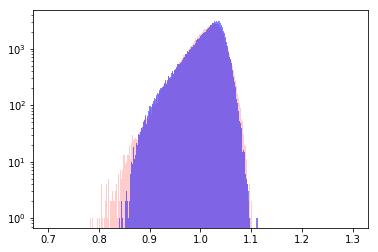

0.0350455241771
0.0343029505543


In [10]:


binning = range(700,1301)
binning = map(lambda x : x/1000.,binning)
plt.hist(df_test['jet_jes_ak7'],bins=binning,color='r', alpha=0.2)
plt.hist(df_test['prediction'],bins=binning,color='b', alpha = 0.5)
plt.gca().set_yscale('log')
plt.show()

print df_test['jet_jes_ak7'].std()
print df_test['prediction'].std()

